In [1]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt
%matplotlib inline


In [141]:
L = 1.492
f = 30

def inv_tension_model(n, mu):
    return np.power(n, 2) / (mu * (2 * f * L) ** 2)

def calc_norm_res(predicted, observed, errors):
    res = observed-predicted
    return res / errors 


In [142]:
n = np.array([2,3,4,5])
freq = np.array([.604, .318, .197, .138])
inv_tension = 1 / (freq * 9.8)
freq_err = np.array([.020, .020, .015, .010])
inv_tension_err = np.multiply(inv_tension, np.divide(inv_tension_err, inv_tension))


In [143]:
parameters, covariance = opt.curve_fit(inv_tension_model, n, inv_tension, p0=[.004], sigma=inv_tension_err, absolute_sigma=True)

mu = parameters[0]
mu_err = np.sqrt(np.diag(covariance))[0]


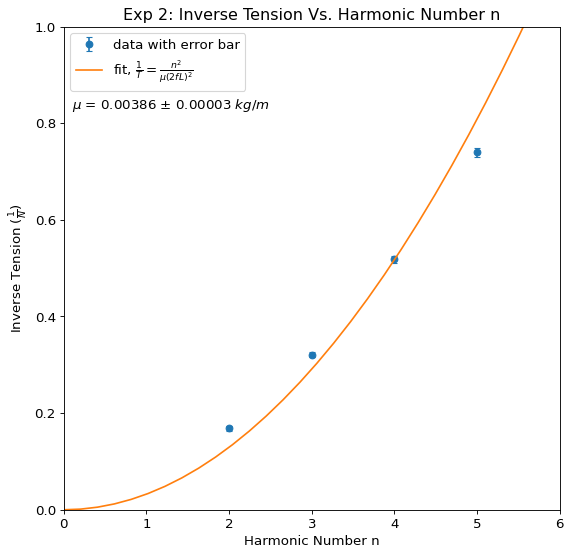

In [144]:
# Plotting data time!

fig1=plt.figure(figsize=(8, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': '12'})

plt.errorbar(n, inv_tension, yerr=inv_tension_err, fmt='o', capsize = 3, capthick = 1, label="data with error bar")
plt.errorbar(np.linspace(0,10), inv_tension_model(np.linspace(0,10), mu), label=r'fit, $\frac{1}{T}=\frac{n^2}{\mu (2fL)^2}$')

plt.title("Exp 2: Inverse Tension Vs. Harmonic Number n")
plt.xlabel("Harmonic Number n")
plt.ylabel(r'Inverse Tension ($\frac{1}{N}$)')

plt.text(0.1,.83, r'$\mu$ = %5.5f ± %5.5f $kg/m$' % (mu, mu_err))
plt.xlim(0, 6)
plt.ylim(0, 1)
plt.legend()
plt.show()

